# Dual Momentum Sector Rotation (DMSR)

**Buy Signal**: When the S&P 500 is above its 10-month simple moving average, buy the sectors with the biggest gains over a three-month timeframe.

**Sell Signal**: Exit all positions when the S&P 500 moves below its 10-month simple moving average on a monthly closing basis.

**Rebalance**: Once per month, sell sectors that fall out of the top tier (three) and buy the sectors that move into the top tier (three).

https://school.stockcharts.com/doku.php?id=trading_strategies:sector_rotation_roc  
https://robotwealth.com/dual-momentum-review/  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from talib.abstract import *

import pinkfish as pf
import strategy

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

In [2]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

Some global data

In [3]:
#symbols = ['XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY']
#symbols = ['IWB', 'SPY', 'VGK', 'IEV', 'EWJ', 'EPP', 'IEF', 'SHY', 'GLD']
symbols = ['SPY', 'TLT', 'NLY', 'GLD']

capital = 10000
start = datetime.datetime(1900, 1, 1)
#start = datetime.datetime.strptime(pf.SP500_BEGIN, '%Y-%m-%d')
end = datetime.datetime.now()
#end = datetime.datetime(2019, 1, 1)
# num months lookback
lookback = 6
top_tier = 2

use_cache = True
use_absolute_mom = True
use_regime_filter = False

Run Strategy

In [4]:
s = strategy.Strategy(symbols, capital, start, end, margin=1, lookback=lookback,
                      use_cache=use_cache, use_absolute_mom=use_absolute_mom,
                      use_regime_filter=use_regime_filter, top_tier=top_tier)
s.run()

Retrieve log DataFrames

In [5]:
rlog, tlog, dbal = s.get_logs()
stats = s.get_stats()

In [6]:
rlog.head()

,date,seq_num,price,shares,entry_exit,direction,symbol
0,2006-05-01,0,2.50,2001,entry,LONG,NLY
1,2006-05-01,1,65.16,76,entry,LONG,GLD
2,2006-06-01,2,2.49,38,exit,LONG,NLY
3,2006-06-01,3,62.56,2,entry,LONG,GLD
4,2006-07-03,4,2.45,8,entry,LONG,NLY


In [7]:
tlog.tail()

,entry_date,entry_price,exit_date,exit_price,pl_points,pl_cash,qty,cumul_total,direction,symbol
262,2020-04-01,149.45,2020-08-21,182.03,32.58,1726.74,53,9309.95,LONG,GLD
263,2020-05-01,167.35,2020-08-21,166.20,-1.15,-1.15,1,9308.80,LONG,TLT
264,2020-06-01,161.91,2020-08-21,166.20,4.29,8.58,2,9317.38,LONG,TLT
265,2020-07-01,163.24,2020-08-21,166.20,2.96,2.96,1,9320.34,LONG,TLT
266,2020-08-03,169.95,2020-08-21,166.20,-3.75,-3.75,1,9316.59,LONG,TLT


In [8]:
dbal.tail()

,high,low,close,shares,cash,leverage,state
date,,,,,,,
2020-08-17,19404.73,19404.73,19404.73,110,195.60,1.00,-
2020-08-18,19560.46,19560.46,19560.46,110,195.60,1.00,-
2020-08-19,19186.93,19186.93,19186.93,110,195.60,1.00,-
2020-08-20,19338.08,19338.08,19338.08,110,195.60,1.00,-
2020-08-21,19316.59,19316.59,19316.59,0,19316.59,1.00,X


Generate strategy stats - display all available stats

In [9]:
pf.print_full(stats)

start                                                   2006-04-26
end                                                     2020-08-21
beginning_balance                                            10000
ending_balance                                            19316.59
total_net_profit                                           9316.59
gross_profit                                              28043.47
gross_loss                                               -18726.87
profit_factor                                                 1.50
return_on_initial_capital                                    93.17
annual_return_rate                                            4.70
trading_period                           14 years 3 months 26 days
pct_time_in_market                                           98.75
margin                                                           1
avg_leverage                                                  1.00
max_leverage                                                  

Run Benchmark, Retrieve benchmark logs, and Generate benchmark stats

In [10]:
benchmark = pf.Benchmark('SPY', capital, s.start, s.end, use_adj=True)
benchmark.run()
benchmark.tlog, benchmark.dbal = benchmark.get_logs()
benchmark.stats = benchmark.get_stats()

2006-04-26 00:00:00 BUY  102 SPY @ 97.62
2020-08-21 00:00:00 SELL 102 SPY @ 339.48


Plot Equity Curves: Strategy vs Benchmark

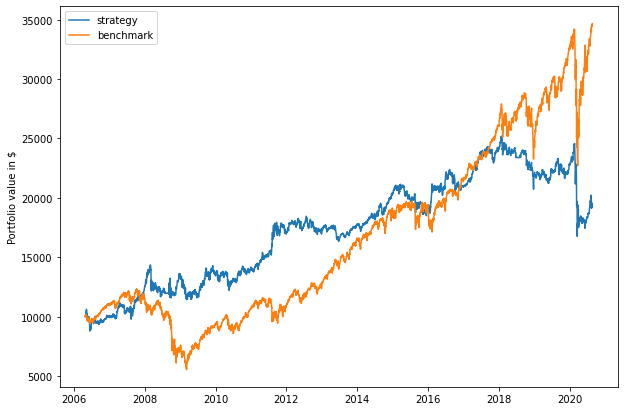

In [11]:
pf.plot_equity_curve(dbal, benchmark=benchmark.dbal)

Plot Trades

Bar Graph: Strategy vs Benchmark

,strategy,benchmark
annual_return_rate,4.70,9.07
max_closed_out_drawdown,-33.46,-55.00
drawdown_annualized_return,-7.11,-6.06
drawdown_recovery,-2.14,-1.42
best_month,14.55,23.44
worst_month,-31.61,-30.95
sharpe_ratio,0.37,0.53
sortino_ratio,0.44,0.63
monthly_std,3.66,4.74
annual_std,10.47,16.25


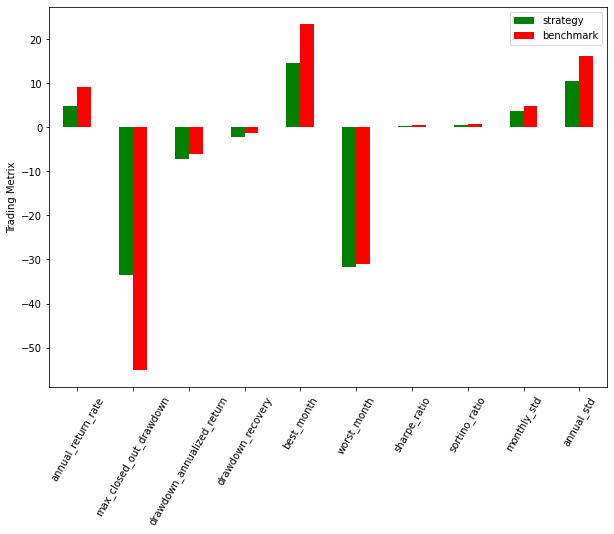

In [12]:
df = pf.plot_bar_graph(stats, benchmark.stats)
df